In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
CE4JI = pd.read_csv('./magazine/final/CE4JI_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [4]:
CE4JI['ADFN_2'] = CE4JI['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [5]:
CE4JI['ADFN_2']

0      [골드, 장식, 포인트, 준, 케이프, 체크, 코트, 백, 산드로, Sandro, ...
1      [재킷, 셔츠, 크리스, CELINE, CELINE, 팬츠, 다잉브, 리드, 슈즈,...
2      [민트, 색, 후드, 톱, 크롬, 하츠, Chrome, Hearts, 안경, CEL...
3      [빈티지, 한, 체크, 무늬, 재킷, CELINE, CELINE, 비비드, 핑크, ...
4      [화이트, 슬리브, 리스, 스트라이프, 오버, 팬츠, CELINE, CELINE, ...
                             ...                        
344    [지수, 볼수록, 좋아짐, 성격, 예쁘다, 노래, 노력, 실력, 시킴, 기획사, 마...
345    [지수, 웃긴, 캐릭터, 이상한, 캐릭터, 웃김, 하든, 궁, 시렁, 궁, 시렁, ...
346    [지수, 멘트, 재밌어서, 보고있는, 행복함, 지수, 폭발, ☆, 나와, 줬으면, ...
347    [저녁, 도레미, 마켓, 지수, 소통, 하려구, v, 앱, 켜, 줬으면, 기념, 스...
348    [감도, 쩌, 참도, 글코, 드라마, 주인공, 지수, 패널, 지수, 얼굴, 입덕, ...
Name: ADFN_2, Length: 349, dtype: object

### top50 리스트 생성

In [6]:
top500 = pd.read_csv('./CE4JI_top500.csv', sep='|', encoding = 'utf-8')

In [7]:
top500

,word,count
0,지수,4233
1,예쁘다,1889
2,귀엽다,740
3,얼굴,523
4,CELINE,462
...,...,...
495,아마,18
496,마다,18
497,SNS,18
498,",",18


In [8]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['지수', '예쁘다', '귀엽다', '얼굴', 'CELINE', '사랑', '노래', 'DIOR', '매력', '목소리', '음악', '패션', '브랜드', '스타일', '춤', '컬렉션', '아이돌', '실력', 'SLIMANE', 'HEDI', '최고', '라이브', '성격', '디자이너', '음색', '드레스', '여자', '메이크업', '사랑스럽다', '팬츠']


In [9]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['지수', '예쁘다', '귀엽다', '얼굴', 'CELINE', '사랑', '노래', 'DIOR', '매력', '목소리', '음악', '패션', '브랜드', '스타일', '춤', '컬렉션', '아이돌', '실력', 'SLIMANE', 'HEDI', '최고', '라이브', '성격', '디자이너', '음색', '드레스', '여자', '메이크업', '사랑스럽다', '팬츠', '블랙', '여신', '새로운', '디자인', '여성', '분위기', '배우', '외모', '컬러', '시즌', '비주얼', '세계', '지난', '재킷', '남성', '매치', '룩', '이미지', '아름다운', '쇼']


### top100

In [10]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['지수', '예쁘다', '귀엽다', '얼굴', 'CELINE', '사랑', '노래', 'DIOR', '매력', '목소리', '음악', '패션', '브랜드', '스타일', '춤', '컬렉션', '아이돌', '실력', 'SLIMANE', 'HEDI', '최고', '라이브', '성격', '디자이너', '음색', '드레스', '여자', '메이크업', '사랑스럽다', '팬츠', '블랙', '여신', '새로운', '디자인', '여성', '분위기', '배우', '외모', '컬러', '시즌', '비주얼', '세계', '지난', '재킷', '남성', '매치', '룩', '이미지', '아름다운', '쇼', '영국', '모델', '완성', '백', '핑크', '무대', '아이템', '옷', '라인', 'PHOEBE', 'PHILO', '디렉터', '팬', '장식', '셔츠', 'LAURENT', '가장', '솔로', 'SAINT', '레전드', '느낌', '스타', 'CHANEL', '화이트', '걸그룹', '노력', '데님', '톱', '스커트', '복', '레드', '코트', '하우스', '자연', '친구', '크리에이티브', '가수', '입덕', '시대', '마음', '반전', '드라마', '다양한', '파리', '카디건', '보컬', '여름', '인기', '부츠', '웃음']


In [11]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['지수', '예쁘다', '귀엽다', '얼굴', 'CELINE', '사랑', '노래', 'DIOR', '매력', '목소리', '음악', '패션', '브랜드', '스타일', '춤', '컬렉션', '아이돌', '실력', 'SLIMANE', 'HEDI', '최고', '라이브', '성격', '디자이너', '음색', '드레스', '여자', '메이크업', '사랑스럽다', '팬츠', '블랙', '여신', '새로운', '디자인', '여성', '분위기', '배우', '외모', '컬러', '시즌', '비주얼', '세계', '지난', '재킷', '남성', '매치', '룩', '이미지', '아름다운', '쇼', '영국', '모델', '완성', '백', '핑크', '무대', '아이템', '옷', '라인', 'PHOEBE', 'PHILO', '디렉터', '팬', '장식', '셔츠', 'LAURENT', '가장', '솔로', 'SAINT', '레전드', '느낌', '스타', 'CHANEL', '화이트', '걸그룹', '노력', '데님', '톱', '스커트', '복', '레드', '코트', '하우스', '자연', '친구', '크리에이티브', '가수', '입덕', '시대', '마음', '반전', '드라마', '다양한', '파리', '카디건', '보컬', '여름', '인기', '부츠', '웃음', '클래식', '볼', '빛', 'BLINK', '대한', '변화', '버버리', '뷰티', '천재', '연예인', '벨트', '매장', '인형', '니트', '시크', '찰떡', '런웨이', '화보', '연기', '대', '취향', '천사', '티셔츠', '가을', '아티스트', '인스타그램', '도전', '립', '세대', '소녀', '입술', '멋있다', '벨벳', '실루엣', '첫', '미소', '겨울', '리스트', '피부', '코디', '로고', '이야기', '액세서리', '프로', '앨범', '말투', '활동', '게임', '최근', '리', '현재', '실물', '시작', '반응

In [12]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['지수', '예쁘다', '귀엽다', '얼굴', 'CELINE', '사랑', '노래', 'DIOR', '매력', '목소리', '음악', '패션', '브랜드', '스타일', '춤', '컬렉션', '아이돌', '실력', 'SLIMANE', 'HEDI', '최고', '라이브', '성격', '디자이너', '음색', '드레스', '여자', '메이크업', '사랑스럽다', '팬츠', '블랙', '여신', '새로운', '디자인', '여성', '분위기', '배우', '외모', '컬러', '시즌', '비주얼', '세계', '지난', '재킷', '남성', '매치', '룩', '이미지', '아름다운', '쇼', '영국', '모델', '완성', '백', '핑크', '무대', '아이템', '옷', '라인', 'PHOEBE', 'PHILO', '디렉터', '팬', '장식', '셔츠', 'LAURENT', '가장', '솔로', 'SAINT', '레전드', '느낌', '스타', 'CHANEL', '화이트', '걸그룹', '노력', '데님', '톱', '스커트', '복', '레드', '코트', '하우스', '자연', '친구', '크리에이티브', '가수', '입덕', '시대', '마음', '반전', '드라마', '다양한', '파리', '카디건', '보컬', '여름', '인기', '부츠', '웃음', '클래식', '볼', '빛', 'BLINK', '대한', '변화', '버버리', '뷰티', '천재', '연예인', '벨트', '매장', '인형', '니트', '시크', '찰떡', '런웨이', '화보', '연기', '대', '취향', '천사', '티셔츠', '가을', '아티스트', '인스타그램', '도전', '립', '세대', '소녀', '입술', '멋있다', '벨벳', '실루엣', '첫', '미소', '겨울', '리스트', '피부', '코디', '로고', '이야기', '액세서리', '프로', '앨범', '말투', '활동', '게임', '최근', '리', '현재', '실물', '시작', '반응

In [13]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['지수', '예쁘다', '귀엽다', '얼굴', 'CELINE', '사랑', '노래', 'DIOR', '매력', '목소리', '음악', '패션', '브랜드', '스타일', '춤', '컬렉션', '아이돌', '실력', 'SLIMANE', 'HEDI', '최고', '라이브', '성격', '디자이너', '음색', '드레스', '여자', '메이크업', '사랑스럽다', '팬츠', '블랙', '여신', '새로운', '디자인', '여성', '분위기', '배우', '외모', '컬러', '시즌', '비주얼', '세계', '지난', '재킷', '남성', '매치', '룩', '이미지', '아름다운', '쇼', '영국', '모델', '완성', '백', '핑크', '무대', '아이템', '옷', '라인', 'PHOEBE', 'PHILO', '디렉터', '팬', '장식', '셔츠', 'LAURENT', '가장', '솔로', 'SAINT', '레전드', '느낌', '스타', 'CHANEL', '화이트', '걸그룹', '노력', '데님', '톱', '스커트', '복', '레드', '코트', '하우스', '자연', '친구', '크리에이티브', '가수', '입덕', '시대', '마음', '반전']


### top50만 남기기

In [14]:
len(CE4JI)

349

In [15]:
top30_word = []
for i in range(len(CE4JI)):
    w=[]
    for word in CE4JI.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [16]:
top50_word = []
for i in range(len(CE4JI)):
    w=[]
    for word in CE4JI.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [17]:
top100_word = []
for i in range(len(CE4JI)):
    w=[]
    for word in CE4JI.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [18]:
top200_word = []
for i in range(len(CE4JI)):
    w=[]
    for word in CE4JI.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [19]:
top300_word = []
for i in range(len(CE4JI)):
    w=[]
    for word in CE4JI.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [20]:
top500_word = []
for i in range(len(CE4JI)):
    w=[]
    for word in CE4JI.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [21]:
CE4JI

,magazine,brand,title,word,ADFN,ADFN_2
0,A,Ce,코트 체크,"골드 잠금 장식으로 포인트를 준 케이프 체크 코트는 1백9만원, 산드로(SANDRO...","['골드', '장식', '포인트', '준', '케이프', '체크', '코트', '백...","[골드, 장식, 포인트, 준, 케이프, 체크, 코트, 백, 산드로, Sandro, ..."
1,A,Ce,"GOOD TIME, 헨리","재킷, 셔츠, 네크리스는 모두 CELINE(CELINE), 팬츠는 다잉브리드, 슈즈...","['재킷', '셔츠', '크리스', 'CELINE', 'CELINE', '팬츠', ...","[재킷, 셔츠, 크리스, CELINE, CELINE, 팬츠, 다잉브, 리드, 슈즈,..."
2,A,Ce,하나만 걸쳐도 남달라! 후디 입는 법 12,"민트색 후드 톱은 가격미정, 크롬하츠(CHROME HEARTS). 안경은 52만원,...","['민트', '색', '후드', '톱', '크롬', '하츠', 'Chrome', '...","[민트, 색, 후드, 톱, 크롬, 하츠, Chrome, Hearts, 안경, CEL..."
3,A,Ce,가을에 어울리는 색을 딱 하나 고르면? 카멜색!,"빈티지한 체크무늬 재킷은 가격미정, CELINE(CELINE). 비비드한 핑크 컬러...","['빈티', '한', '체크', '무늬', '재킷', 'CELINE', 'CELIN...","[빈티지, 한, 체크, 무늬, 재킷, CELINE, CELINE, 비비드, 핑크, ..."
4,A,Ce,"웃음 뒤의 웃음, 남윤수","화이트 슬리브리스, 스트라이프 오버올 팬츠는 모두 CELINE(CELINE)., 화...","['화이트', '슬리브', '리스', '스트라이프', '오버', '팬츠', 'CEL...","[화이트, 슬리브, 리스, 스트라이프, 오버, 팬츠, CELINE, CELINE, ..."
...,...,...,...,...,...,...
344,YOUTUBE,Ji,블랙핑크 지수 실력없다고 왜이래~ 나 블랙핑크야~ 제대로 보여줄게! [All Abo...,['지수 진짜 보면 볼수록 더 좋아짐 성격도 좋고 예쁘다 노래도 잘하고 노력도 많이...,"['지수', '진짜', '보면', '볼수록', '더', '좋아짐', '성격', '도...","[지수, 볼수록, 좋아짐, 성격, 예쁘다, 노래, 노력, 실력, 시킴, 기획사, 마..."
345,YOUTUBE,Ji,사랑스러움지수 한도초과! 🧡지수🖤 모음 3탄! [예능맛ZIP 맛남의 광장_Delic...,['지수 엄청 웃긴 캐릭터라기보다 이상한 캐릭터라서 웃김 ㅋㅋㅋㅋㅋㅋ 다른 BLAC...,"['지수', '엄청', '웃긴', '캐릭터', '라기', '보다', '이상한', '...","[지수, 웃긴, 캐릭터, 이상한, 캐릭터, 웃김, 하든, 궁, 시렁, 궁, 시렁, ..."
346,YOUTUBE,Ji,지수 MBTI는 'CUTE'가 분명해 🧡지수🖤 모음 5탄! [예능맛ZIP 맛남의 광...,"['지수는 멘트하나하나가 넘 재밌어서 보고있는더 행복함^^', '지수 예능 폭발 ☆...","['지수', '는', '멘트', '하', '나', '하나', '가', '넘', '재...","[지수, 멘트, 재밌어서, 보고있는, 행복함, 지수, 폭발, ☆, 나와, 줬으면, ..."
347,YOUTUBE,Ji,지수가 먹지 지수 먹방 영상😎 _ BLACKPINK JISOO_korean_comm...,['오늘 저녁 7시 40분 도레미 마켓에 지수와 로제가 출연합니다! 'BLACKPI...,"['오늘', '저녁', '7시', '40분', '도레미', '마켓', '에', '지...","[저녁, 도레미, 마켓, 지수, 소통, 하려구, v, 앱, 켜, 줬으면, 기념, 스..."


### item 남기기

In [22]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [23]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [24]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [25]:
# len(top100_not_item_word)

In [26]:
# top100_not_item_word[1]

In [27]:
top50_word

[['팬츠', '컬러', 'CELINE', 'CELINE', 'CELINE'],
 ['재킷', 'CELINE', 'CELINE', '팬츠'],
 ['CELINE', 'CELINE', '라이브', '블랙', 'CELINE', '블랙', '컬러', '컬러', '재킷'],
 ['재킷', 'CELINE', 'CELINE', '컬러', '팬츠'],
 ['팬츠', 'CELINE', 'CELINE', '재킷', '팬츠', 'CELINE'],
 ['시즌', '스타일', 'CELINE', '컬렉션', '컬러', '컬러', 'CELINE', 'CELINE'],
 ['CELINE', 'HEDI', 'SLIMANE', 'CELINE', 'HEDI', 'SLIMANE'],
 ['팬츠', 'CELINE', 'HEDI', 'SLIMANE', 'CELINE', 'HEDI', 'SLIMANE'],
 ['CELINE', 'HEDI', 'SLIMANE', 'CELINE', 'HEDI', 'SLIMANE'],
 ['시즌',
  '시즌',
  '패션',
  '스타일',
  '사랑스럽다',
  '드레스',
  '컬렉션',
  'CELINE',
  '패션',
  '새로운',
  '스타일',
  '컬러',
  '패션',
  '룩',
  'HEDI',
  'SLIMANE',
  'CELINE',
  '룩',
  '룩'],
 ['팬츠',
  'CELINE',
  'HEDI',
  'SLIMANE',
  'CELINE',
  'HEDI',
  'SLIMANE',
  '컬러',
  '팬츠',
  'CELINE',
  'HEDI',
  'SLIMANE',
  '스타일',
  '컬러',
  'CELINE',
  '패션',
  '룩',
  '팬츠',
  'CELINE',
  'HEDI',
  'SLIMANE'],
 ['드레스',
  'CELINE',
  'HEDI',
  'SLIMANE',
  'CELINE',
  'HEDI',
  'SLIMANE',
  'CELINE',
  'HEDI',
  'SLIMANE',


In [28]:
len(top50_word)

349

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [29]:
# 어프라이어리(Apriori)
from apyori import apriori

In [30]:
top30_word[0]

['팬츠', 'CELINE', 'CELINE', 'CELINE']

In [40]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.07))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
284,"(지수, 사랑)",0.200573,"[((), (사랑, 지수), 0.20057306590257878, 1.0), ((사...",2
233,"(매력, 지수)",0.200573,"[((), (매력, 지수), 0.20057306590257878, 1.0), ((매...",2
324,"(얼굴, 지수)",0.200573,"[((), (얼굴, 지수), 0.20057306590257878, 1.0), ((얼...",2
168,"(DIOR, 지수)",0.186246,"[((), (DIOR, 지수), 0.18624641833810887, 1.0), (...",2
155,"(컬렉션, CELINE)",0.163324,"[((), (컬렉션, CELINE), 0.16332378223495703, 1.0)...",2
306,"(스타일, 지수)",0.157593,"[((), (스타일, 지수), 0.15759312320916904, 1.0), ((...",2
188,"(귀엽다, 지수)",0.154728,"[((), (귀엽다, 지수), 0.15472779369627507, 1.0), ((...",2
156,"(패션, CELINE)",0.154728,"[((), (패션, CELINE), 0.15472779369627507, 1.0),...",2
140,"(브랜드, CELINE)",0.151862,"[((), (브랜드, CELINE), 0.1518624641833811, 1.0),...",2
335,"(예쁘다, 지수)",0.148997,"[((), (예쁘다, 지수), 0.1489971346704871, 1.0), ((예...",2


In [41]:
for item in df['items']:
    if '제니' in item:
        print(item)

In [42]:
df[df['items'] == {'제니'}]

,items,support,ordered_statistics,length


### networkx 그래프 정의

In [43]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [44]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [45]:
pos = nx.spring_layout(G)

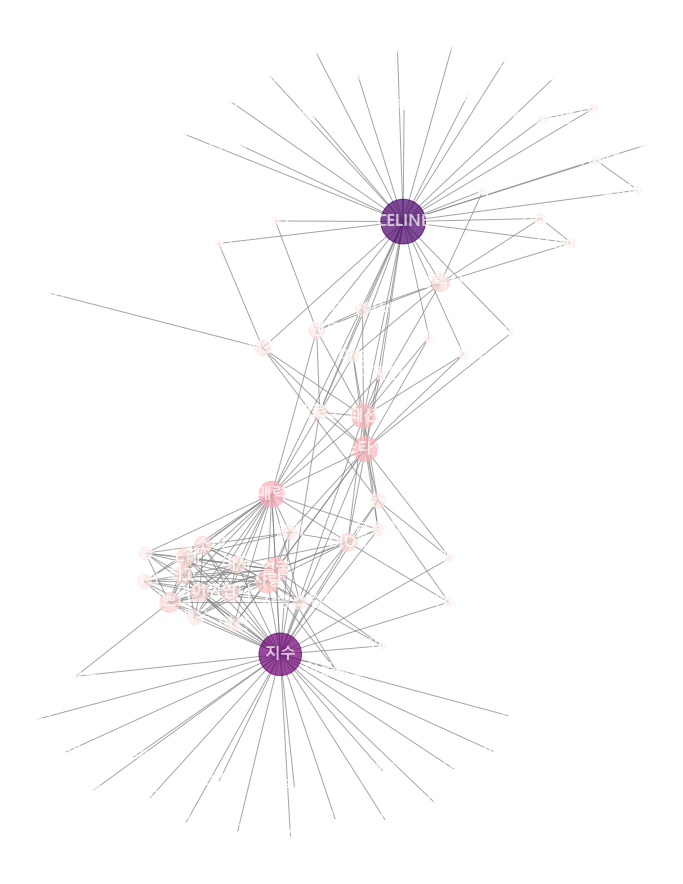

In [46]:
plt.figure(figsize = (12, 16)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.RdPu,
                font_color = 'white', font_weight = 'bold')

plt.savefig('./final_img/nt_CE4JI_top500_mis07-w.png', bbox_inches = 'tight', transparent = True)
plt.show()


In [ ]:
# ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']